<a href="https://colab.research.google.com/github/silvesttrnovikov-crypto/Homework_/blob/main/untitl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нomework_1

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2025-10-13 10:13:03--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-10-13 10:13:03 (4.93 MB/s) - ‘train.csv’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1efUeYyQWo9A_rZWk49RUDOX3FIwUnG0_WcQI7YXr-hI/edit#gid=0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1pZaZC8cX5bFUM6Ac14rErB2glVI0cR116Xjv3a_2ncM/edit#gid=0


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('InteractiveSheet_2025-10-13_10_14_51.xlsx', sheet_name='Лист1')
survival = df.groupby('Pclass')['Survived'].mean()
print(survival)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


2

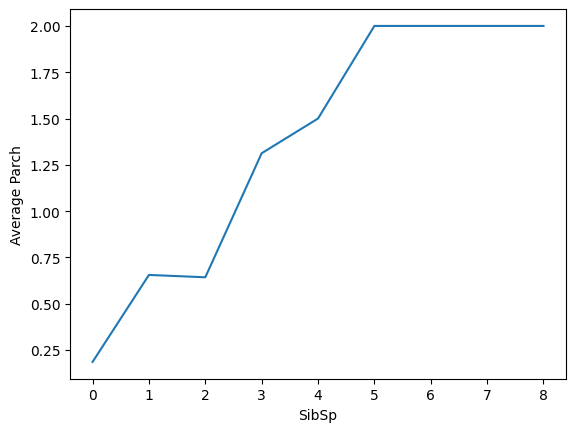

In [ ]:
data.groupby('SibSp')['Parch'].mean().plot()
plt.xlabel('SibSp')
plt.ylabel('Average Parch')
plt.show()

3

In [ ]:
#Чтобы улучшть точность нужно увеличить число ближаших соседей и число признаков
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Pclass", "Sex", "Age"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Age'] = features['Age'].fillna(features['Age'].median())
    return features

model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.85


4

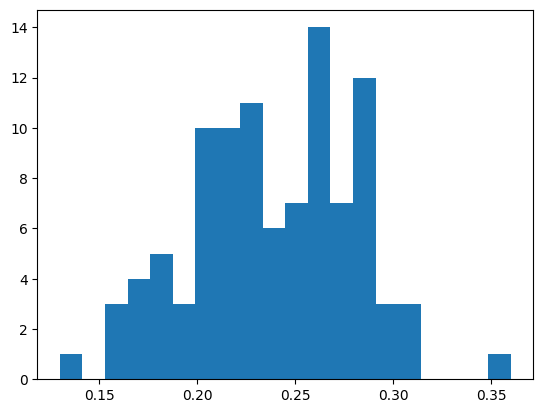

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Pclass", "Sex", "Age"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Age'] = features['Age'].fillna(features['Age'].median())
    return features

model = KNeighborsClassifier(n_neighbors=5)

data = pd.read_csv("train.csv", index_col='PassengerId')

test_scores = []

for i in range(100):
    data_train, data_test = train_test_split(data, test_size=100, random_state=i)#не заметил эту функцию в тексте задания - долго не мог понять как сделать этот этап

    model.fit(
        feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)),
        data_train['Survived']
    )

    test_predictions = model.predict(
        feature_selection_and_preprocessing(data_test.drop('Survived', axis=1))
    )

    accuracy = accuracy_score(data_test['Survived'], test_predictions)
    test_scores.append(accuracy)

test_errors = [1 - score for score in test_scores]

plt.hist(test_errors, bins=20)
plt.show()

#Homework_2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1

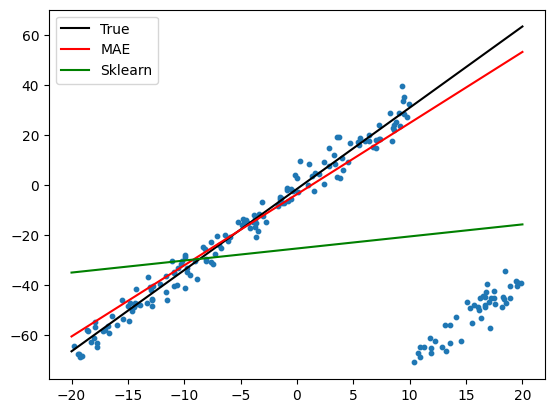

In [ ]:
from sklearn.linear_model import LinearRegression

np.random.seed(50)
x = np.random.uniform(-20, 20, 200)
y = 3.25 * x - 1.47 + np.random.normal(size=200) * 4
y[x > 10] += -100  # выбросы

w = np.random.randn(2)
for i in range(1000):
    y_pred = w[0] + w[1] * x
    w[0] -= 0.01 * -np.mean(np.sign(y - y_pred))
    w[1] -= 0.01 * -np.mean(np.sign(y - y_pred) * x)

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

plt.scatter(x, y, s=10)
x_plot = np.linspace(-20, 20, 200)
plt.plot(x_plot, 3.25*x_plot - 1.47, 'k', label='True')
plt.plot(x_plot, w[0] + w[1]*x_plot, 'r', label='MAE')
plt.plot(x_plot, lr.predict(x_plot.reshape(-1, 1)), 'g', label='Sklearn')
plt.legend()
plt.show()
# очевидно MAE менее чувствительна к выбросам и как следствие дает лучшее приближение

2

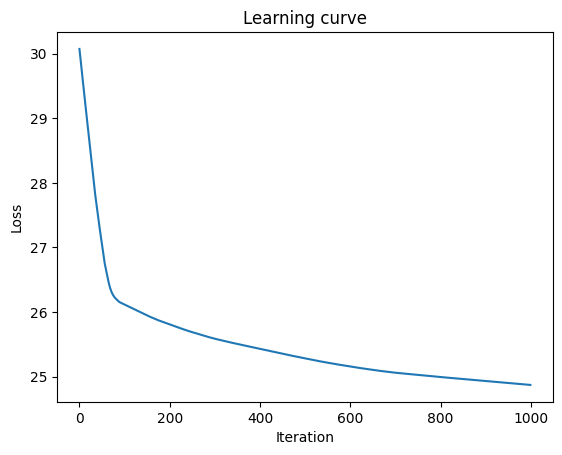

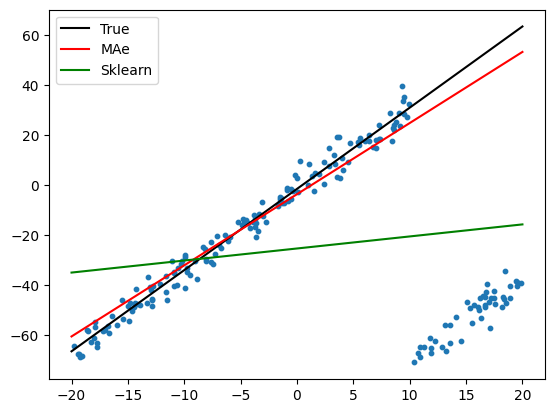

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin

class LinearRegressionSGD(BaseEstimator, RegressorMixin):
    def __init__(self, loss='mae', lr=0.01, n_iter=1000):
        self.loss, self.lr, self.n_iter = loss, lr, n_iter
    def fit(self, x, y):
        x = x.ravel()
        self.w = np.random.randn(2)
        self.history = []
        for _ in range(self.n_iter):
            y_pred = self.w[0] + self.w[1]*x
            err = y - y_pred
            g = -np.sign(err) if self.loss=='mae' else -2*err
            self.w[0] -= self.lr*np.mean(g)
            self.w[1] -= self.lr*np.mean(g*x)
            self.history.append(np.mean(np.abs(err)) if self.loss=='mae' else np.mean(err**2))
        return self
    def predict(self, x): return self.w[0] + self.w[1]*x.ravel()
    def fit_predict(self, x, y): return self.fit(x, y).predict(x)

np.random.seed(50)
x = np.random.uniform(-20, 20, 200)
y = 3.25*x - 1.47 + np.random.normal(size=200)*4
y[x > 10] += -100

model = LinearRegressionSGD(loss='mae', lr=0.01, n_iter=1000).fit(x, y)
lr = LinearRegression().fit(x.reshape(-1,1), y)

plt.plot(model.history)
plt.title('Learning curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

x_plot = np.linspace(-20, 20, 200)
plt.scatter(x, y, s=10)
plt.plot(x_plot, 3.25*x_plot - 1.47, 'k', label='True')
plt.plot(x_plot, model.predict(x_plot), 'r', label='MAe')
plt.plot(x_plot, lr.predict(x_plot.reshape(-1,1)), 'g', label='Sklearn')
plt.legend(); plt.show()
#зависимость не изменилась

#Homework_3

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2025-10-13 11:46:41--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-10-13 11:46:41 (5.09 MB/s) - ‘train.csv.1’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]].copy()
    features["Fare"] = features["Fare"].fillna(features["Fare"].median())
    features["Age"] = features["Age"].fillna(features["Age"].median())
    features["Embarked"] = features["Embarked"].fillna("S")
    features["FamilySize"] = features["SibSp"] + features["Parch"] + 1
    features["FarePerPerson"] = features["Fare"] / features["FamilySize"]
    features["Age*Class"] = features["Age"] * features["Pclass"]
    features["IsAlone"] = (features["FamilySize"] == 1).astype(int)
    return features

model = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(), ["Sex", "Embarked"]),
        remainder=StandardScaler()
    ),
    LogisticRegression(C=0.1, max_iter=1000)
)

# Validation code
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)),
    data_train['Survived']
)

train_predictions = model.predict(feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)))
test_predictions = model.predict(feature_selection_and_preprocessing(data_test.drop('Survived', axis=1)))

print("Train accuracy:", accuracy_score(data_train['Survived'], train_predictions))
print("Test accuracy:", accuracy_score(data_test['Survived'], test_predictions))

Train accuracy: 0.7988422575976846
Test accuracy: 0.81


#Homework_4

1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

100%|██████████| 100/100 [00:00<00:00, 547.34it/s]


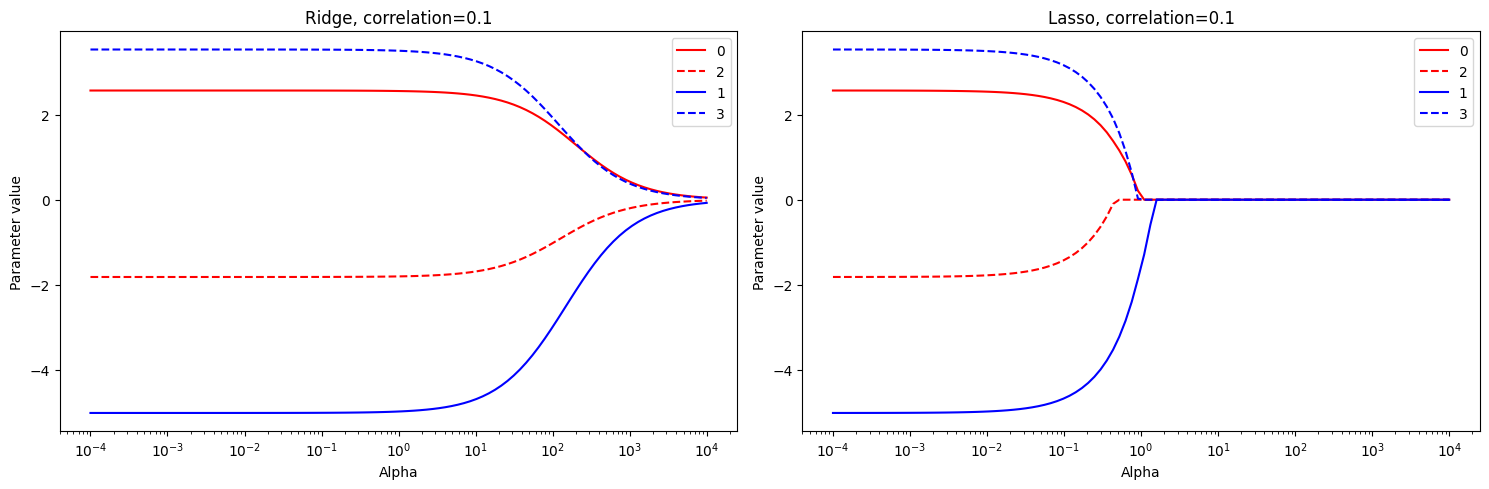

100%|██████████| 100/100 [00:00<00:00, 367.14it/s]


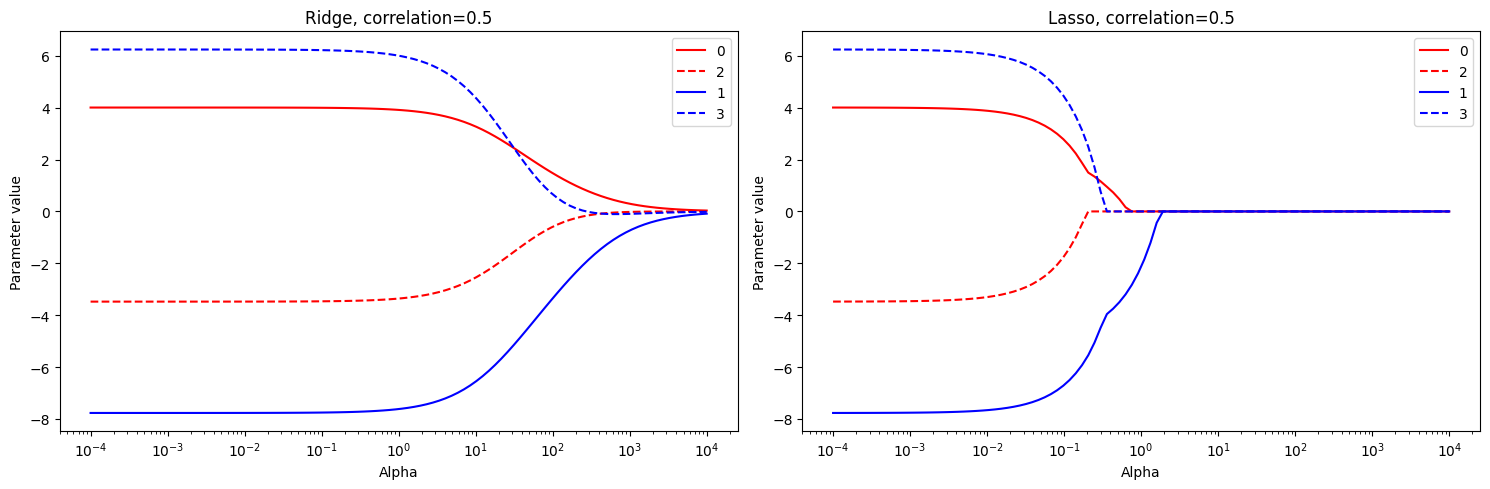

100%|██████████| 100/100 [00:00<00:00, 407.58it/s]


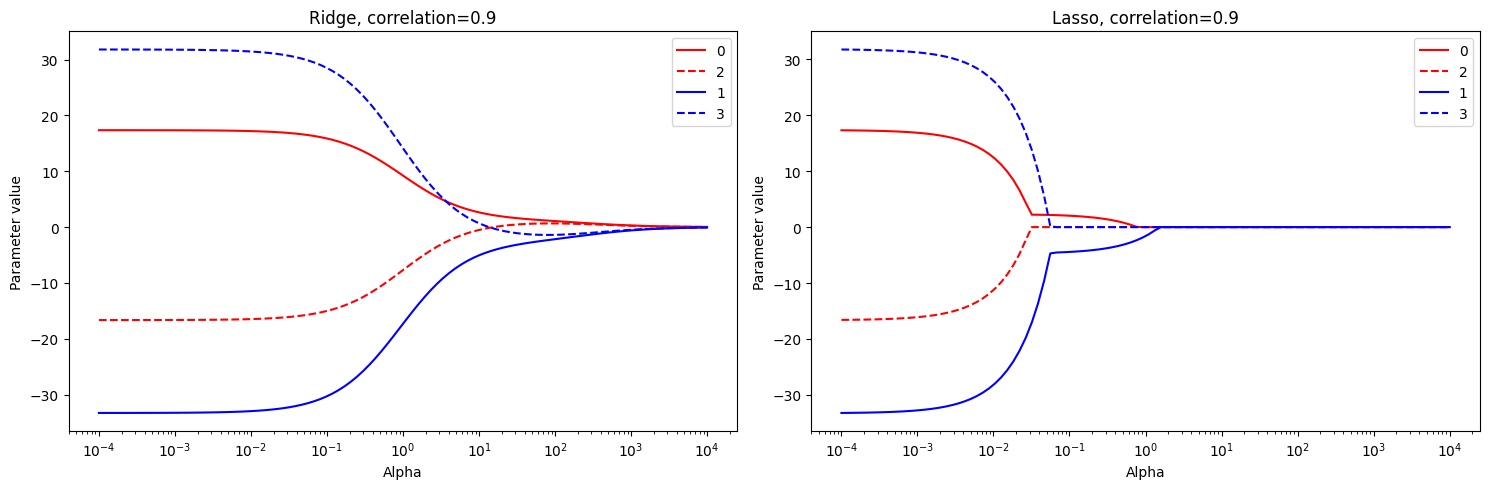

In [ ]:

from tqdm import tqdm
def gen_data(N, correlation=0.5):
    X = np.random.uniform(-1., 1., size=(N, 4))
    y = X @ [2.3, -4.7, -1.7, 3.2]
    X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]
    y += np.random.normal(size=y.shape)
    return X, y

for correlation in [0.1, 0.5, 0.9]:
    X, y = gen_data(500, correlation)
    alpha_values = np.logspace(-4, 4, 100, base=10)

    params_ridge = []
    params_lasso = []

    for alpha in tqdm(alpha_values):
        ridge = Ridge(alpha=alpha, fit_intercept=False)
        ridge.fit(X, y)
        params_ridge.append(ridge.coef_)

        lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
        lasso.fit(X, y)
        params_lasso.append(lasso.coef_)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(alpha_values, [p[0] for p in params_ridge], 'r-', label='0')
    plt.plot(alpha_values, [p[2] for p in params_ridge], 'r--', label='2')
    plt.plot(alpha_values, [p[1] for p in params_ridge], 'b-', label='1')
    plt.plot(alpha_values, [p[3] for p in params_ridge], 'b--', label='3')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Parameter value')
    plt.title(f'Ridge, correlation={correlation}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(alpha_values, [p[0] for p in params_lasso], 'r-', label='0')
    plt.plot(alpha_values, [p[2] for p in params_lasso], 'r--', label='2')
    plt.plot(alpha_values, [p[1] for p in params_lasso], 'b-', label='1')
    plt.plot(alpha_values, [p[3] for p in params_lasso], 'b--', label='3')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Parameter value')
    plt.title(f'Lasso, correlation={correlation}')
    plt.legend()

    plt.tight_layout()
    plt.show()

При увеличении корреляции параметры сжимаются к одинаковым значениям быстрее, причем для Lasso это сжатие происходит значитльно быстрее. При этом Ridge сходится равномерно, тогда как Lasso неравномерно (рывком)

#Homework_5

1


X_best = FeatureSelector(num_features_best).fit_transform(X, y)
Отбор признаков (feature selection) выполняется до (cross-validation), в результате для обучения используются как обучающая, так и тестовая выборки.

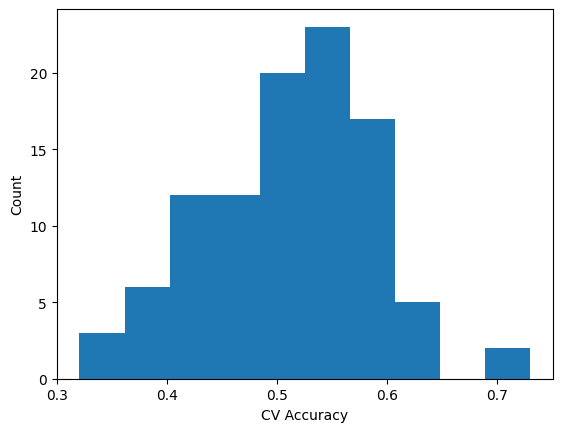

0.5123000000000001


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

class FeatureSelector:
    def __init__(self, num_features):
        self.n = num_features

    def fit(self, X, y):
        covariance = ((X - X.mean(axis=0)) * (y[:, np.newaxis] - y.mean())).mean(axis=0)
        self.best_feature_ids = np.argsort(np.abs(covariance))[-self.n:]
        return self

    def transform(self, X):
        return X[:, self.best_feature_ids]

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

num_features_total = 1000
num_features_best = 100
N = 100

def experiment():
    X = np.random.normal(size=(N, num_features_total))
    y = np.random.randint(2, size=N)

    pipeline = Pipeline([
        ('selector', FeatureSelector(num_features_best)),
        ('model', LinearSVC())
    ])

    return cross_val_score(pipeline, X, y, scoring='accuracy', cv=10, n_jobs=-1).mean()

results = [experiment() for _ in range(100)]
plt.hist(results, bins=10)
plt.xlabel("CV Accuracy")
plt.ylabel("Count")
plt.show()

print(np.mean(results))


2

In [8]:
!wget -q https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Pclass", "Sex", "Age"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Age'] = features['Age'].fillna(features['Age'].median())
    return features

data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]
X_train = feature_selection_and_preprocessing(data_train.drop('Survived', axis=1))
y_train = data_train['Survived']
X_test = feature_selection_and_preprocessing(data_test.drop('Survived', axis=1))
y_test = data_test['Survived']
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
best_knn = grid_search.best_estimator_
test_predictions = best_knn.predict(X_test)
print(accuracy_score(y_test, test_predictions))

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.7788472255393678
0.82


#Homework_6

1

max_depth=1: train accuracy=0.5072
max_depth=2: train accuracy=0.5113
max_depth=3: train accuracy=0.5387
max_depth=4: train accuracy=0.9037
max_depth=5: train accuracy=1.0000

Минимальная глубина дерева с accuracy > 0.99: 5


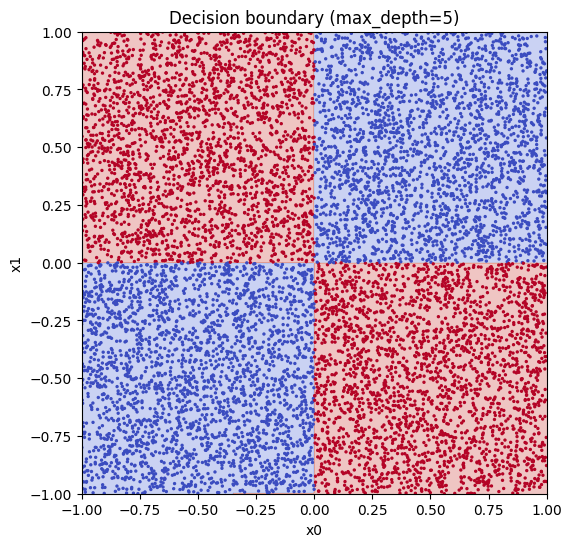

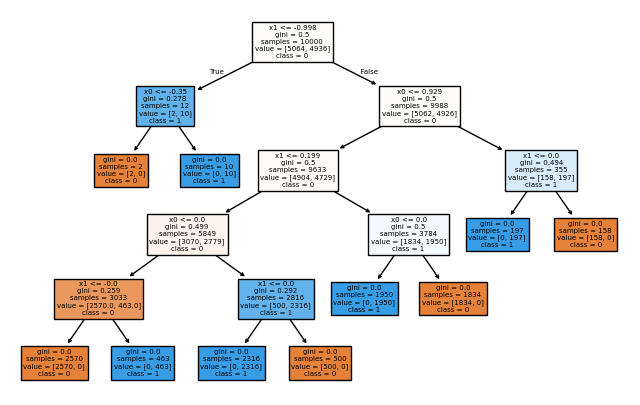

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
N = 10000
X = np.random.uniform(-1, 1, (N, 2))
y = ((X[:, 0] >= 0) ^ (X[:, 1] >= 0)).astype(int)
best_depth = None
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X, y)
    acc = accuracy_score(y, model.predict(X))
    print(f"max_depth={depth}: train accuracy={acc:.4f}")
    if acc > 0.99:
        best_depth = depth
        break
print("\nМинимальная глубина дерева с accuracy > 0.99:", best_depth)
model = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
model.fit(X, y)
xx, yy = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=2)
plt.title(f"Decision boundary (max_depth={best_depth})")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()
plt.figure(figsize=(8,5))
plot_tree(model, filled=True, feature_names=["x0", "x1"], class_names=["0", "1"])
plt.show()


2

Best ROC-AUC (no weights, train CV): 0.9741673813607775
Test ROC-AUC (no weights): 0.9534313725490197
Best ROC-AUC (weighted, train CV): 0.9703473413379073
Test ROC-AUC (weighted): 0.9401108269394715


<Figure size 600x600 with 0 Axes>

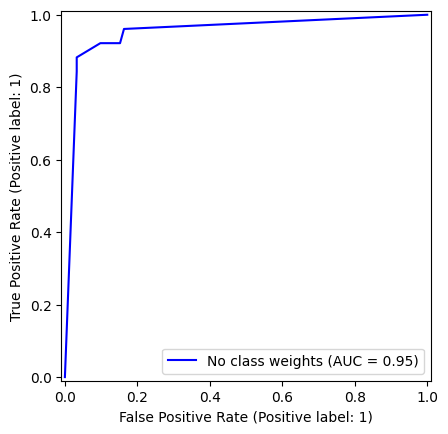

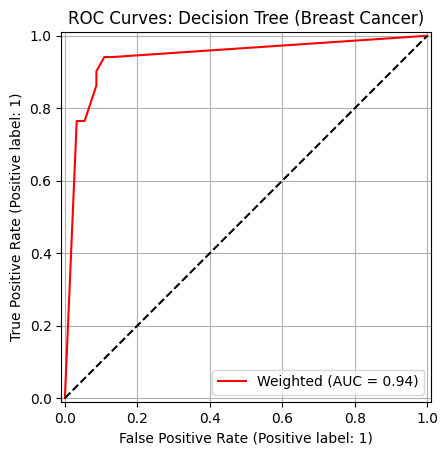

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=12345
)

def find_best_tree(class_weight=None):
    tree = DecisionTreeClassifier(random_state=12345, class_weight=class_weight)
    param_grid = {
        "max_depth": range(1, 11),
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 5, 10]
    }
    grid = GridSearchCV(
        estimator=tree,
        param_grid=param_grid,
        scoring="roc_auc",
        cv=5,
        n_jobs=-1
    )
    grid.fit(X_train, (y_train == "malignant").astype(int))
    return grid.best_estimator_, grid.best_score_

best_tree_no_weights, auc_train_no_w = find_best_tree(class_weight=None)

best_tree_weighted, auc_train_w = find_best_tree(class_weight={1: 2., 0: 1.})

y_test_bin = (y_test == "malignant").astype(int)

proba_no_weights = best_tree_no_weights.predict_proba(X_test)[:, 1]
proba_weighted = best_tree_weighted.predict_proba(X_test)[:, 1]

roc_auc_no_weights = roc_auc_score(y_test_bin, proba_no_weights)
roc_auc_weighted = roc_auc_score(y_test_bin, proba_weighted)

print("Best ROC-AUC (no weights, train CV):", auc_train_no_w)
print("Test ROC-AUC (no weights):", roc_auc_no_weights)
print("Best ROC-AUC (weighted, train CV):", auc_train_w)
print("Test ROC-AUC (weighted):", roc_auc_weighted)

plt.figure(figsize=(6,6))
RocCurveDisplay.from_predictions(y_test_bin, proba_no_weights, name="No class weights", color="blue")
RocCurveDisplay.from_predictions(y_test_bin, proba_weighted, name="Weighted", color="red")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves: Decision Tree (Breast Cancer)")
plt.grid(True)
plt.show()


Accuracy: 0.69


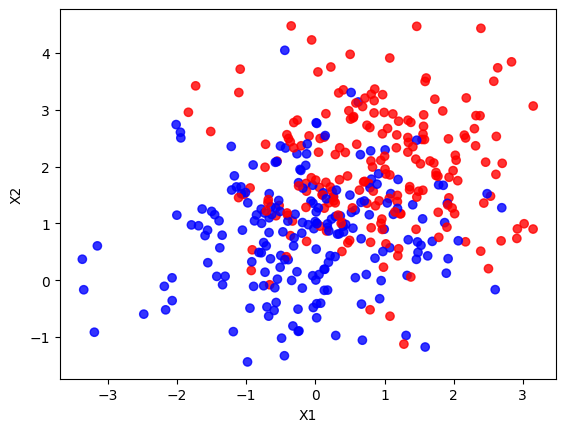

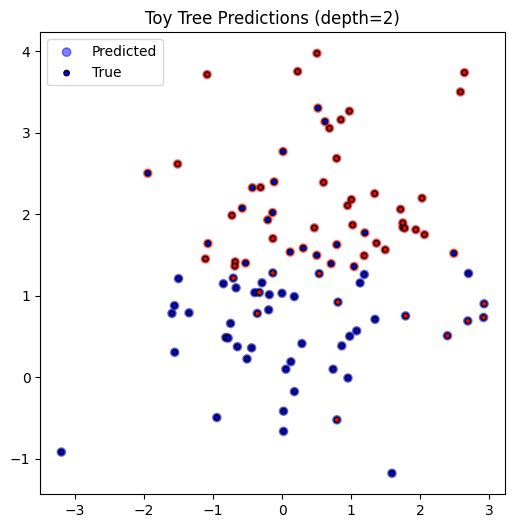

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from scipy.optimize import minimize

X_toy, y_toy = make_blobs(n_samples=400,
                          centers=[[0., 1.], [1., 2.]],
                          random_state=14)

plt.scatter(X_toy[:, 0], X_toy[:, 1], c=y_toy, alpha=0.8, cmap='bwr')
plt.xlabel('X1'), plt.ylabel('X2');

X_toy_train, X_toy_test, y_toy_train, y_toy_test = \
    train_test_split(X_toy, y_toy, test_size=0.25, random_state=0)

max_tree_depth = 2

class Tree:
    def __init__(self, data=None, left=None, right=None, prediction=0, level=0):
        self.data = data
        self.left  = left
        self.right = right
        self.rule = lambda x, i: print("Try to run fit first")
        self.prediction = prediction
        self.level = level

    def __str__(self):
        return f"Tree(level={self.level}, pred={self.prediction})"

    def is_leaf(self):
        return self.left is None and self.right is None

    def predict(self, some_data, indices=None, predictions=None):
        predictions = np.full((some_data.shape[0]), 2) if predictions is None else predictions
        indices = np.arange(some_data.shape[0]) if indices is None else indices

        if self.is_leaf():
            predictions[indices] = self.prediction
        else:
            left_inds, right_inds = self.rule(some_data, indices)
            self.left.predict(some_data, indices=left_inds, predictions=predictions)
            self.right.predict(some_data, indices=right_inds, predictions=predictions)
        if self.level == 0:
            return predictions

    def gini(self, y):
        if len(y) == 0:
            return 0
        p = np.mean(y)
        return 2 * p * (1 - p)

    def fit(self, X, y):
        if self.level >= max_tree_depth or len(np.unique(y)) == 1:
            self.prediction = int(np.mean(y) >= 0.5)
            return self

        best_feat, best_thresh, best_score = None, None, np.inf

        for feat in range(X.shape[1]):
            def objective(threshold):
                left_mask = X[:, feat] <= threshold
                right_mask = ~left_mask
                gini_left = self.gini(y[left_mask])
                gini_right = self.gini(y[right_mask])
                weighted = (len(y[left_mask]) * gini_left + len(y[right_mask]) * gini_right) / len(y)
                return weighted

            res = minimize(objective, x0=np.median(X[:, feat]), bounds=[(X[:, feat].min(), X[:, feat].max())])
            if res.fun < best_score:
                best_score = res.fun
                best_feat = feat
                best_thresh = res.x[0]

        def rule_func(in_X, indices):
            mask = in_X[indices, best_feat] <= best_thresh
            return indices[mask], indices[~mask]

        self.rule = rule_func
        self.data = (best_feat, best_thresh)

        left_inds, right_inds = self.rule(X, np.arange(X.shape[0]))

        self.left = Tree(level=self.level + 1)
        self.left.fit(X[left_inds], y[left_inds])

        self.right = Tree(level=self.level + 1)
        self.right.fit(X[right_inds], y[right_inds])

        return self

tree = Tree()
tree.fit(X_toy_train, y_toy_train)
my_preds = tree.predict(X_toy_test)

print("Accuracy:", accuracy_score(y_toy_test, my_preds))

plt.figure(figsize=(6,6))
plt.scatter(X_toy_test[:,0], X_toy_test[:,1], c=my_preds, cmap='bwr', alpha=0.5, label='Predicted')
plt.scatter(X_toy_test[:,0], X_toy_test[:,1], c=y_toy_test, cmap='bwr', edgecolor='k', s=15, label='True')
plt.legend()
plt.title("Toy Tree Predictions (depth=2)")
plt.show()